In [ ]:
!pip install qiskit
from qiskit import QuantumCircuit, QuantumRegister

In [3]:
from qiskit import Aer, transpile, assemble
from qiskit.visualization import plot_histogram

In [4]:
def initialise(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

In [5]:
def oracle1() -> QuantumCircuit:
    """Oracle 1 for assignment 3 Q1 (a).
    1 solution of 8 items.

    Returns:
        Oracle circuit.
    """
    data_reg = QuantumRegister(3)
    ancilla = QuantumRegister(1)
    circuit = QuantumCircuit(data_reg, ancilla, name='Oracle1')
    
    circuit.x(data_reg[1])
    circuit.mcx(data_reg, ancilla)
    circuit.x(data_reg[1])
    return circuit

In [6]:
def oracle2() -> QuantumCircuit:
    """Oracle 2 for assignment 3 Q1 (b)
    2 solutions of 8 items.

    Returns:
        Oracle circuit.
    """
    data_reg = QuantumRegister(3)
    ancilla = QuantumRegister(1)
    circuit = QuantumCircuit(data_reg, ancilla, name='Oracle2')
    
    circuit.x(data_reg[1])
    circuit.mcx(data_reg, ancilla)
    circuit.x(data_reg[1])
    circuit.x(data_reg[0])
    circuit.mcx(data_reg, ancilla)
    circuit.x(data_reg[0])
    return circuit

#Q1 a

In [ ]:
# Initialise
n = 3
grover_circuit = QuantumCircuit(QuantumRegister(n), QuantumRegister(1))
# initialise 1st register to + state
grover_circuit = initialise(grover_circuit, [0, 1, 2])

# INITIALISE ANCILLA TO MINUS STATE
grover_circuit.x(3)
grover_circuit.h(3)

grover_circuit.barrier()
grover_circuit.draw()

In [8]:
# Oracle
oracle = oracle1()
oracle.barrier()
oracle.draw()

░ 
q2_0: ───────■────────░─
      ┌───┐  │  ┌───┐ ░ 
q2_1: ┤ X ├──■──┤ X ├─░─
      └───┘  │  └───┘ ░ 
q2_2: ───────■────────░─
           ┌─┴─┐      ░ 
  q3: ─────┤ X ├──────░─
           └───┘      ░

In [9]:
# Diffusion
dif = QuantumCircuit(QuantumRegister(n), QuantumRegister(1))
dif.h([0, 1, 2])
dif.x([0, 1, 2])
# multi-controlled z
dif.h(2)
dif.mct([0, 1], 2)
dif.h(2)
dif.barrier()
dif.x([0, 1, 2])
dif.h([0, 1, 2])
dif.draw()



┌───┐┌───┐                ░ ┌───┐┌───┐
q4_0: ┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├
      ├───┤├───┤       │        ░ ├───┤├───┤
q4_1: ┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├
      ├───┤├───┤┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤
q4_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├
      └───┘└───┘└───┘└───┘└───┘ ░ └───┘└───┘
  q5: ──────────────────────────░───────────
                                ░

In [ ]:
# Add parts together
grover_circuit = grover_circuit.compose(oracle)
grover_circuit = grover_circuit.compose(dif)
# Apply again to improve results
grover_circuit = grover_circuit.compose(oracle)
grover_circuit = grover_circuit.compose(dif)
# and again :)
# grover_circuit = grover_circuit.compose(oracle)
# grover_circuit = grover_circuit.compose(dif)
# grover_circuit = grover_circuit.compose(oracle)
# grover_circuit = grover_circuit.compose(dif)
# grover_circuit = grover_circuit.compose(oracle)
# grover_circuit = grover_circuit.compose(dif)
grover_circuit.draw()

In [11]:
# Convert ancilla to computational basis for measurement
grover_circuit.barrier()
grover_circuit.h(3)
grover_circuit.x(3)
grover_circuit.draw()

┌───┐      ░                 ░ ┌───┐┌───┐                ░ ┌───┐┌───┐»
q0_0: ┤ H ├──────░────────■────────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├»
      ├───┤      ░ ┌───┐  │  ┌───┐ ░ ├───┤├───┤       │        ░ ├───┤├───┤»
q0_1: ┤ H ├──────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├»
      ├───┤      ░ └───┘  │  └───┘ ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤»
q0_2: ┤ H ├──────░────────■────────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├»
      ├───┤┌───┐ ░      ┌─┴─┐      ░ └───┘└───┘└───┘└───┘└───┘ ░ └───┘└───┘»
  q1: ┤ X ├┤ H ├─░──────┤ X ├──────░───────────────────────────░───────────»
      └───┘└───┘ ░      └───┘      ░                           ░           »
«                      ░ ┌───┐┌───┐                ░ ┌───┐┌───┐ ░           
«q0_0: ───────■────────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├─░───────────
«      ┌───┐  │  ┌───┐ ░ ├───┤├───┤       │        ░ ├───┤├───┤ ░           
«q0_1: ┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├─░───────────
«      └───┘  │  └───┘ ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤ ░           
«q0_2: ───────■────────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├─░───────────
«           ┌─┴─┐      ░ └───┘└───┘└───┘└───┘└───┘ ░ └───┘└───┘ ░ ┌───┐┌───┐
«  q1: ─────┤ X ├──────░───────────────────────────░────────────░─┤ H ├┤ X ├
«           └───┘      ░                           ░            ░ └───┘└───┘

In [12]:
grover_circuit.measure_all()

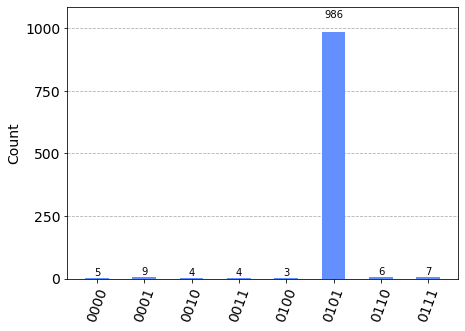

In [13]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

# ADD EXTRA CODE, H Gates, INITIALISE, ORACLE, DIFFUSER, ORACLE, DIFFUSER, MEASURE



#Q1 b

In [ ]:
# Initialise
n = 3
grover_circuit = QuantumCircuit(QuantumRegister(n), QuantumRegister(1))
# initialise 1st register to + state
grover_circuit = initialise(grover_circuit, [0, 1, 2])

# INITIALISE ANCILLA TO MINUS STATE
grover_circuit.x(3)
grover_circuit.h(3)

grover_circuit.barrier()
grover_circuit.draw()

In [ ]:
oracle = oracle2()
oracle.draw()

In [ ]:
grover_circuit = grover_circuit.compose(oracle)
grover_circuit.barrier()
grover_circuit = grover_circuit.compose(dif)

# grover_circuit = grover_circuit.compose(oracle)
# grover_circuit = grover_circuit.compose(dif)
grover_circuit.draw()

In [16]:
# Convert ancilla to computational basis for measurement
grover_circuit.barrier()
grover_circuit.h(3)
grover_circuit.x(3)
grover_circuit.draw()

┌───┐      ░           ┌───┐     ┌───┐ ░ ┌───┐┌───┐                ░ »
q12_0: ┤ H ├──────░────────■──┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■────────░─»
       ├───┤      ░ ┌───┐  │  ├───┤  │  └───┘ ░ ├───┤├───┤       │        ░ »
q12_1: ┤ H ├──────░─┤ X ├──■──┤ X ├──■────────░─┤ H ├┤ X ├───────■────────░─»
       ├───┤      ░ └───┘  │  └───┘  │        ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐ ░ »
q12_2: ┤ H ├──────░────────■─────────■────────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─»
       ├───┤┌───┐ ░      ┌─┴─┐     ┌─┴─┐      ░ └───┘└───┘└───┘└───┘└───┘ ░ »
  q13: ┤ X ├┤ H ├─░──────┤ X ├─────┤ X ├──────░───────────────────────────░─»
       └───┘└───┘ ░      └───┘     └───┘      ░                           ░ »
«       ┌───┐┌───┐ ░           
«q12_0: ┤ X ├┤ H ├─░───────────
«       ├───┤├───┤ ░           
«q12_1: ┤ X ├┤ H ├─░───────────
«       ├───┤├───┤ ░           
«q12_2: ┤ X ├┤ H ├─░───────────
«       └───┘└───┘ ░ ┌───┐┌───┐
«  q13: ───────────░─┤ H ├┤ X ├
«                  ░ └───┘└───┘

In [17]:
grover_circuit.measure_all()

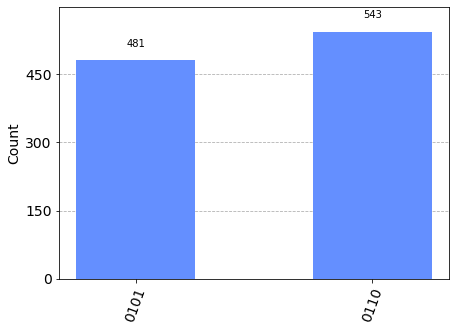

In [18]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

#Q2

In [14]:
from typing import List
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


def qram(data: List) -> QuantumCircuit:
    """A naive implementation of QRAM for assigment 3 Q1 (c).
    Given the data list, it prepares the state \sum_x |x>|D(x)>,
    where the |x> is the address (index) and |D(x)> is the data in the corresponding address,
    e,g, if the list is [3, 5, 1], then the state is (|0>|3> + |1>|5> + |2>|1>) / sqrt(3).

    Note: this function will note construct the superposition of address register,
    remember to apply H gates by yourself.

    Args:
        data: The Python List object of the data you want to search.

    Returns:
        circuit: QuantumCircuit for QRAM.
    """
    num_addr_bits = int(np.ceil(np.log2(len(data))))
    num_data_bits = int(np.ceil(np.log2(max(data))))
    address_reg = QuantumRegister(num_addr_bits)
    data_reg = QuantumRegister(num_data_bits)
    circuit = QuantumCircuit(address_reg, data_reg, name='QRAM')
    
    for id_addr in range(len(data)):
        # load address index
        id_str = format(id_addr, 'b').zfill(len(address_reg))
        for i_id_str, b_id_str in enumerate(id_str):
            if b_id_str == '0': circuit.x(address_reg[i_id_str])
        # load data
        data_str = format(data[id_addr], 'b').zfill(len(data_reg))
        for i_data_str, b_data_str in enumerate(data_str):
            if b_data_str == '1': circuit.mct(address_reg, data_reg[i_data_str])

        for i_id_str, b_id_str in enumerate(id_str):
            if b_id_str == '0': circuit.x(address_reg[i_id_str])
        circuit.barrier()
    return circuit


def oracle_c(num_data: int) -> QuantumCircuit:
    """Oracle for assignment 3 Q1 (c).
    This oracle is used for determining if the data == 5, not the index.

    Args:
        num_data: Number of qubits in data register.

    Returns:
        Oracle circuit.
    """
    data_reg = QuantumRegister(num_data)
    ancilla = QuantumRegister(1)
    circuit = QuantumCircuit(data_reg, ancilla, name='Oracle')
    
    circuit.x(data_reg[1])
    circuit.mcx(data_reg, ancilla)
    circuit.x(data_reg[1])
    return circuit

In [ ]:
ram = qram([5, 2, 4, 5, 3, 7, 6, 1])
ram.add_register(QuantumRegister(1))
ram.draw()

In [ ]:
grover_circuit.clear()
# Initialise grover circuit
n = 3

addr_qbits = QuantumRegister(n)
data_qbits = QuantumRegister(3)
ancilla = QuantumRegister(1)
grover_circuit = QuantumCircuit(addr_qbits, data_qbits, ancilla)
# initialise 1st register to + state


grover_circuit = initialise(grover_circuit, [0, 1, 2])
# INITIALISE ANCILLA TO MINUS STATE
grover_circuit.x(6)
grover_circuit.h(6)

grover_circuit.barrier()

grover_circuit = grover_circuit.compose(ram)
grover_circuit.draw()

In [25]:
oracle = oracle_c(3)
oracle.draw()

q37_0: ───────■───────
       ┌───┐  │  ┌───┐
q37_1: ┤ X ├──■──┤ X ├
       └───┘  │  └───┘
q37_2: ───────■───────
            ┌─┴─┐     
  q38: ─────┤ X ├─────
            └───┘

In [ ]:
grover_circuit = grover_circuit.compose(oracle, qubits=[3, 4, 5, 6])
grover_circuit.barrier()
grover_circuit = grover_circuit.compose(ram)
grover_circuit.barrier()
grover_circuit = grover_circuit.compose(dif, qubits=[0, 1, 2, 6])
grover_circuit.draw()

In [29]:
grover_circuit.barrier()
grover_circuit.h(6)
grover_circuit.x(6)
grover_circuit.draw()

┌───┐      ░ ┌───┐          ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ »
q39_0: ┤ H ├──────░─┤ X ├──■────■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─»
       ├───┤      ░ ├───┤  │    │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ »
q39_1: ┤ H ├──────░─┤ X ├──■────■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░─»
       ├───┤      ░ ├───┤  │    │  ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ »
q39_2: ┤ H ├──────░─┤ X ├──■────■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░─»
       └───┘      ░ └───┘┌─┴─┐  │  └───┘ ░        │        ░ └───┘┌─┴─┐└───┘ ░ »
q40_0: ───────────░──────┤ X ├──┼────────░────────┼────────░──────┤ X ├──────░─»
                  ░      └───┘  │        ░      ┌─┴─┐      ░      └───┘      ░ »
q40_1: ───────────░─────────────┼────────░──────┤ X ├──────░─────────────────░─»
                  ░           ┌─┴─┐      ░      └───┘      ░                 ░ »
q40_2: ───────────░───────────┤ X ├──────░─────────────────░─────────────────░─»
       ┌───┐┌───┐ ░           └───┘      ░                 ░                 ░ »
  q41: ┤ X ├┤ H ├─░────────────────────────────────────────────────────────────»
       └───┘└───┘ ░                                                            »
«       ┌───┐          ┌───┐ ░                      ░                          »
«q39_0: ┤ X ├──■────■──┤ X ├─░────────■────■────────░────────■────■────■───────»
«       └───┘  │    │  └───┘ ░ ┌───┐  │    │  ┌───┐ ░ ┌───┐  │    │    │  ┌───┐»
«q39_1: ───────■────■────────░─┤ X ├──■────■──┤ X ├─░─┤ X ├──■────■────■──┤ X ├»
«              │    │        ░ ├───┤  │    │  ├───┤ ░ └───┘  │    │    │  └───┘»
«q39_2: ───────■────■────────░─┤ X ├──■────■──┤ X ├─░────────■────■────■───────»
«            ┌─┴─┐  │        ░ └───┘  │    │  └───┘ ░      ┌─┴─┐  │    │       »
«q40_0: ─────┤ X ├──┼────────░────────┼────┼────────░──────┤ X ├──┼────┼───────»
«            └───┘  │        ░      ┌─┴─┐  │        ░      └───┘┌─┴─┐  │       »
«q40_1: ────────────┼────────░──────┤ X ├──┼────────░───────────┤ X ├──┼───────»
«                 ┌─┴─┐      ░      └───┘┌─┴─┐      ░           └───┘┌─┴─┐     »
«q40_2: ──────────┤ X ├──────░───────────┤ X ├──────░────────────────┤ X ├─────»
«                 └───┘      ░           └───┘      ░                └───┘     »
«  q41: ───────────────────────────────────────────────────────────────────────»
«                                                                              »
«        ░                      ░       ░                 ░ ┌───┐          »
«q39_0: ─░────────■────■────────░───■───░─────────────────░─┤ X ├──■────■──»
«        ░        │    │        ░   │   ░                 ░ ├───┤  │    │  »
«q39_1: ─░────────■────■────────░───■───░─────────────────░─┤ X ├──■────■──»
«        ░ ┌───┐  │    │  ┌───┐ ░   │   ░                 ░ ├───┤  │    │  »
«q39_2: ─░─┤ X ├──■────■──┤ X ├─░───■───░─────────────────░─┤ X ├──■────■──»
«        ░ └───┘┌─┴─┐  │  └───┘ ░   │   ░                 ░ └───┘┌─┴─┐  │  »
«q40_0: ─░──────┤ X ├──┼────────░───┼───░────────■────────░──────┤ X ├──┼──»
«        ░      └───┘┌─┴─┐      ░   │   ░ ┌───┐  │  ┌───┐ ░      └───┘  │  »
«q40_1: ─░───────────┤ X ├──────░───┼───░─┤ X ├──■──┤ X ├─░─────────────┼──»
«        ░           └───┘      ░ ┌─┴─┐ ░ └───┘  │  └───┘ ░           ┌─┴─┐»
«q40_2: ─░──────────────────────░─┤ X ├─░────────■────────░───────────┤ X ├»
«        ░                      ░ └───┘ ░      ┌─┴─┐      ░           └───┘»
«  q41: ───────────────────────────────────────┤ X ├──────░────────────────»
«                                              └───┘      ░                »
«       ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐          ┌───┐ ░ »
«q39_0: ┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■────■──┤ X ├─░─»
«       ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │    │  └───┘ ░ »
«q39_1: ┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■────■────────░─»
«       ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░        │    │        ░ »
«q39_2: ┤ X ├─░────────■────────░─┤ X

In [30]:
# grover_circuit.measure(qubit=[3, 4, 5], cbit=[0, 1, 2])
grover_circuit.measure_all()

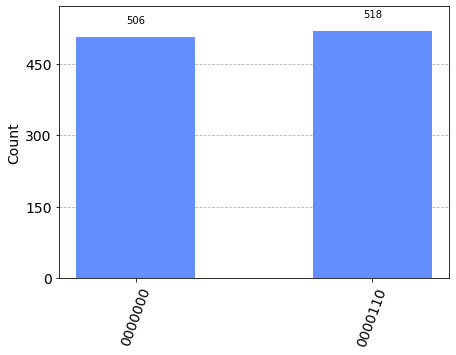

In [31]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

# Report

Q1 a) grover search is implemented by, initialising the 3 qubits in the + state (superposition). We then perform the oracle, to amplify the correct result. Then the diffuser to flip it back to positive. Then end result is the target 010 having greater amplitude than others. In 1a) i performed the oracle and diffuser twice to amplify the correct amplitude further improving the overall accuracy of the search.

Q1 b) Similar to a, however there are two targets as seen in the result. Unlike part a only one amplification was used and yielded results of 110, 101.

Q1 c)  General structure is the following, Initialise address register in + state, load the qram, perform oracle on data register (the register we are searching on for 5), load qram again, diffuse the address register (the register we are measuring), measure address register 

